<a href="https://colab.research.google.com/github/Strongestguy2/Yolo-v8-With-COCO-2017-Dataset/blob/main/Yolo_faster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# i hate to set things up, but here i am doing all these stuff before training the model dammnit
#have to run

%pip -q install fiftyone

import fiftyone as fo
import fiftyone.zoo as foz
import os, json, sys
from datetime import datetime

from google.colab import drive
drive.mount ("/content/drive")

BASE_DIR = "/content/drive/MyDrive/yolo-lab"
DIRS = {
    "datasets" : os.path.join (BASE_DIR, "datasets"),
    "runs" : os.path.join (BASE_DIR, "runs"),
    "checkpoints" : os.path.join (BASE_DIR, "checkpoints"),
    "configs" : os.path.join (BASE_DIR, "configs"),
    "outputs" : os.path.join (BASE_DIR, "outputs"),
}

for d in DIRS.values ():
    os.makedirs (d, exist_ok = True)

timestamp = datetime.now().strftime ("%Y%m%d_%H%M%S")
EXP_NAME  = "yolov8_coco_proto"
RUN_NAME  = f"{timestamp}_{EXP_NAME}"
RUN_DIR   = os.path.join (DIRS ["runs"], RUN_NAME)
os.makedirs (RUN_DIR, exist_ok = True)
FO_CACHE_DIR = "/content/fo_cache"
fo.config.default_dataset_dir = FO_CACHE_DIR
os.makedirs (FO_CACHE_DIR, exist_ok = True)
DATASET_YAML = os.path.join (DIRS ["configs"], "dataset.yaml")
VAL_DS_NAME  = "coco2017_val500_fixed"
VAL_TXT = os.path.join (DIRS ["datasets"], "val_filepaths.txt")

if not os.path.exists (VAL_TXT):
    ds_val = foz.load_zoo_dataset (
        "coco-2017",
        splits = ["validation"],
        label_types = ["detections"],
        max_samples = 500,
        shuffle = True,
        seed = 1234,
        dataset_name = VAL_DS_NAME,
        drop_existing = True,
    )
    with open (VAL_TXT, "w") as f:
        for s in ds_val:
            f.write (s.filepath + "\n")
else:
    pass

META = {
  "BASE_DIR": BASE_DIR,
  "DIRS": DIRS,
  "RUN_DIR": RUN_DIR,
  "RUN_NAME": RUN_NAME,
  "EXP_NAME": EXP_NAME,
  "DATASET_YAML": DATASET_YAML,
  "created_at": timestamp,
}
with open (os.path.join (RUN_DIR, "run_meta.json"), "w") as f:
  json.dump (META, f, indent = 2)

print ("YOLO bootstrap ready. :))))))))))")
print ("BASE_DIR:", BASE_DIR)
print ("RUN_DIR :", RUN_DIR)
print ("DATASET_YAML (to create):", DATASET_YAML)

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 91.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.3/112.3 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.4/112.4 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.8/74.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 48.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 86.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.9/309.9 kB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 934.3/934.3 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 14.2 MB/s eta 0:0

/usr/local/lib/python3.12/dist-packages/glob2/fnmatch.py:141: SyntaxWarning: invalid escape sequence '\Z'
  return '(?ms)' + res + '\Z'


Mounted at /content/drive
YOLO bootstrap ready. :))))))))))
BASE_DIR: /content/drive/MyDrive/yolo-lab
RUN_DIR : /content/drive/MyDrive/yolo-lab/runs/20251012_170132_yolov8_coco_proto
DATASET_YAML (to create): /content/drive/MyDrive/yolo-lab/configs/dataset.yaml


In [28]:
#config
from pprint import pprint
import os, json

DATASET_YAML = os.path.join (DIRS ["configs"], "dataset.yaml")
yaml_text = f"""# custom yolo dataset
path: /content/yolo_data
train: images/train
val: images/val
nc: 80
"""
os.makedirs (DIRS ["configs"], exist_ok = True)
with open (DATASET_YAML, "w") as f:
    f.write (yaml_text)
print ("Wrote dataset.yaml ->", DATASET_YAML)

CFG = {
    "exp_name" : EXP_NAME,
    "project_dir" : DIRS ["runs"],
    "run_name" : RUN_NAME,
    "save_period" : 1,
    "resume" : True,
    "seed" : 42,
    "viz_every" : 200,

    "data_root" : "/content/yolo_data",
    "train_img_dir" : "images/train",
    "val_img_dir" : "images/val",
    "train_lbl_dir" : "labels/train",
    "val_lbl_dir" : "labels/val",
    "num_classes" : 80,
    "imgsz" : 640,
    "letterbox_pad" : 114,

    "hflip_p" : 0.5,
    "hsv_h" : 0.015, "hsv_s" : 0.7, "hsv_v" : 0.4,
    "scale_range" : [0.9, 1.1],
    "translate" : 0.10,

    "strides" : [8, 16, 32],
    "backbone" : "resnet50_fpn",
    "head_hidden" : 256,
    "box_param" : "ltrb",
    "use_obj_branch" : True,

    # optimization
    "epochs" : 50,
    "batch_size" : 16,
    "optimizer" : "adamw",
    "lr" : 2e-4,
    "weight_decay" : 0.05,
    "warmup_epochs" : 3,
    "cosine_schedule" : True,
    "amp" : True,
    "grad_clip_norm" : 10.0,
    "ema_decay" : 0.9998,

    "reg_max" : 16,
    "assigner" : "center_prior",
    "iou_type" : "ciou",
    "loss_weights" : {"box" : 2.5, "cls" : 1.0, "obj" : 1.0, "dfl" : 0.0},
}

pprint (CFG)

Wrote dataset.yaml -> /content/drive/MyDrive/yolo-lab/configs/dataset.yaml
{'amp': True,
 'assigner': 'center_prior',
 'backbone': 'resnet50_fpn',
 'batch_size': 16,
 'box_param': 'ltrb',
 'cosine_schedule': True,
 'data_root': '/content/yolo_data',
 'ema_decay': 0.9998,
 'epochs': 50,
 'exp_name': 'yolov8_coco_proto',
 'grad_clip_norm': 10.0,
 'head_hidden': 256,
 'hflip_p': 0.5,
 'hsv_h': 0.015,
 'hsv_s': 0.7,
 'hsv_v': 0.4,
 'imgsz': 640,
 'iou_type': 'ciou',
 'letterbox_pad': 114,
 'loss_weights': {'box': 2.5, 'cls': 1.0, 'dfl': 0.0, 'obj': 1.0},
 'lr': 0.0002,
 'num_classes': 80,
 'optimizer': 'adamw',
 'project_dir': '/content/drive/MyDrive/yolo-lab/runs',
 'reg_max': 16,
 'resume': True,
 'run_name': '20251012_170132_yolov8_coco_proto',
 'save_period': 1,
 'scale_range': [0.9, 1.1],
 'seed': 42,
 'strides': [8, 16, 32],
 'train_img_dir': 'images/train',
 'train_lbl_dir': 'labels/train',
 'translate': 0.1,
 'use_obj_branch': True,
 'val_img_dir': 'images/val',
 'val_lbl_dir': 'la

In [4]:
import os, json, subprocess, glob
from collections import defaultdict, Counter
import json
import math, random, json
from pathlib import Path

import cv2
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader

import shutil

In [5]:
#load and download next chunk
import time
import fiftyone as fo
import fiftyone.zoo as foz
from fiftyone import ViewField as F

DS_TRAIN_ROLL = "coco2017_train_roll2k"
TARGET = 2000

def load_next_train_chunk (seen_paths, tries=6):
    from fiftyone import ViewField as F
    seen_paths = list (seen_paths)
    for _ in range (tries):
        seed = int (time.time ()) % 2_000_000_000
        ds = foz.load_zoo_dataset (
            "coco-2017",
            splits = ["train"],
            label_types = ["detections"],
            max_samples = TARGET,
            shuffle = True,
            seed = seed,
            dataset_name = DS_TRAIN_ROLL,
            drop_existing = True,
        )

        fresh = ds.match (~F ("filepath").is_in (seen_paths))

        n = len (fresh)
        if n >= int (0.9 * TARGET):
            print (f"Using train chunk with {n} fresh samples (seed={seed})")
            return fresh

        print (f"Overlap too high ({n} fresh). Retrying...")

    print (f"Proceeding with {n} fresh after retries")
    return fresh


In [6]:
#manage seen samples and next unseen chunk

SEEN_TXT = os.path.join (DIRS ["datasets"], "seen_filepaths.txt")
CURR_CHUNK_TXT = os.path.join (DIRS ["datasets"], "current_chunk_paths.txt")

def _load_seen ():
    if not os.path.exists (SEEN_TXT):
        return set ()
    with open (SEEN_TXT, "r") as f:
        return set (l.strip () for l in f if l.strip ())

def _save_current_chunk (paths):
    with open (CURR_CHUNK_TXT, "w") as f:
        for p in paths:
            f.write (p + "\n")

def get_chunk_by_index (ds, split = "train", k = 2000, chunk_index = 0):
    base = ds.match_tags (split).sort_by ("filepath")
    return base.skip (chunk_index * k).limit (k)

def _append_seen (paths):
    seen = _load_seen ().union (paths)
    with open (SEEN_TXT, "w") as f:
        for p in sorted (seen):
            f.write (p + "\n")

def get_next_unseen_chunk (ds, split = "train", k = 2000):
    seen = _load_seen ()
    base = ds.match_tags (split).sort_by ("filepath")
    ids = []
    paths = []

    for s in base:
        if s.filepath not in seen:
            ids.append (s.id)
            paths.append (s.filepath)
            if len (ids) >= k:
                break
    if not ids:
        print (f"No unseen samples left in {split}")
        return None
    view = base.select (ids)
    _save_current_chunk (paths)
    return view

In [7]:
# export
ROOT = "/content/yolo_data"
IMG_TRAIN = f"{ROOT}/images/train"
IMG_VAL   = f"{ROOT}/images/val"
LBL_TRAIN = f"{ROOT}/labels/train"
LBL_VAL   = f"{ROOT}/labels/val"
for p in [IMG_TRAIN, IMG_VAL, LBL_TRAIN, LBL_VAL]:
    os.makedirs (p, exist_ok = True)

COCO_NAMES = [
  "person", "bicycle", "car", "motorcycle", "airplane", "bus", "train", "truck", "boat", "traffic light",
  "fire hydrant", "stop sign", "parking meter", "bench", "bird", "cat", "dog", "horse", "sheep", "cow",
  "elephant", "bear", "zebra", "giraffe", "backpack", "umbrella", "handbag", "tie", "suitcase",
  "frisbee", "skis", "snowboard", "sports ball", "kite", "baseball bat", "baseball glove", "skateboard",
  "surfboard", "tennis racket", "bottle", "wine glass", "cup", "fork", "knife", "spoon", "bowl",
  "banana", "apple", "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza", "donut", "cake",
  "chair", "couch", "potted plant", "bed", "dining table", "toilet", "tv", "laptop", "mouse", "remote",
  "keyboard", "cell phone", "microwave", "oven", "toaster", "sink", "refrigerator", "book", "clock",
  "vase", "scissors", "teddy bear", "hair drier", "toothbrush"
]
name_to_idx = {n : i for i, n in enumerate (COCO_NAMES)}

def detections_field (dataset):
    schema = dataset.get_field_schema ()
    for name, field in schema.items ():
        if hasattr (field, "document_type"):
            try:
                import fiftyone.core.labels as fol
                if field.document_type is fol.Detections:
                    return name
            except Exception:
                pass
    return "ground_truth"

def _clean_dir (pat_list):
    for pat in pat_list:
        for p in glob.glob(pat):
            try: os.remove(p)
            except: pass

def symlink_and_write_labels(sample_collection, split: str):
    import numpy as np
    field = detections_field(sample_collection._dataset)

    img_dir = IMG_TRAIN if split == "train" else IMG_VAL
    lbl_dir = LBL_TRAIN if split == "train" else LBL_VAL

    _clean_dir([os.path.join(img_dir, "*"), os.path.join(lbl_dir, "*.txt")])

    wrote, bad_boxes = 0, 0
    for s in sample_collection:
        src  = s.filepath
        stem = Path(src).stem
        ext  = Path(src).suffix.lower()
        dst_stem = f"{split}__{stem}"
        dst_img  = os.path.join(img_dir, f"{dst_stem}{ext}")
        dst_lbl  = os.path.join(lbl_dir, f"{dst_stem}.txt")

        if not os.path.exists(dst_img):
            os.symlink(src, dst_img)

        # pull detections from FiftyOne sample
        dets = getattr(s, field, None)
        H = s.metadata.height if s.metadata is not None else None
        W = s.metadata.width  if s.metadata is not None else None

        lines = []
        if dets is not None and getattr(dets, "detections", None) and H and W:
            for d in dets.detections:
                cname = d.label
                if cname not in name_to_idx:
                    continue
                cls_id = name_to_idx[cname]
                # FO COCO boxes are normalized [x, y, w, h] in [0,1]
                x, y, w, h = d.bounding_box
                cx = x + w/2
                cy = y + h/2

                # clip just in case
                cx = float(np.clip(cx, 0.0, 1.0))
                cy = float(np.clip(cy, 0.0, 1.0))
                w  = float(np.clip(w,  0.0, 1.0))
                h  = float(np.clip(h,  0.0, 1.0))
                if w <= 0 or h <= 0:
                    bad_boxes += 1
                    continue
                lines.append(f"{cls_id} {cx:.6f} {cy:.6f} {w:.6f} {h:.6f}")

        # write label file (empty file is valid: no objects)
        with open(dst_lbl, "w") as f:
            f.write("\n".join(lines))
        wrote += 1

    print(f"[EXPORT] {split}: wrote {wrote} label files; skipped {bad_boxes} invalid boxes")


In [8]:
def stage_train_chunk ():

  seen = _load_seen ()
  view = load_next_train_chunk (seen)
  _save_current_chunk ([s.filepath for s in view])
  symlink_and_write_labels (view, "train")
  print ("staged ~2000 training samples.")

In [9]:
def stage_val_once ():

    ds_val = foz.load_zoo_dataset (
        "coco-2017",
        splits = ["validation"],
        label_types = ["detections"],
        max_samples = 500,
        shuffle = True,
        seed = 1234,
        dataset_name = "coco2017_val500_fixed",
        drop_existing = False,
    )
    # /content/yolo_data/{images,labels}/val
    symlink_and_write_labels (ds_val, "val")
    print ("staged ~500 validation samples.")

stage_val_once ()

INFO:fiftyone.zoo.datasets:Downloading split 'validation' to '/root/fiftyone/coco-2017/validation' if necessary


INFO:fiftyone.utils.coco:Downloading annotations to '/root/fiftyone/coco-2017/tmp-download/annotations_trainval2017.zip'


 100% |██████|    1.9Gb/1.9Gb [17.6s elapsed, 0s remaining, 132.8Mb/s]      


INFO:eta.core.utils: 100% |██████|    1.9Gb/1.9Gb [17.6s elapsed, 0s remaining, 132.8Mb/s]      


Extracting annotations to '/root/fiftyone/coco-2017/raw/instances_val2017.json'


INFO:fiftyone.utils.coco:Extracting annotations to '/root/fiftyone/coco-2017/raw/instances_val2017.json'


INFO:fiftyone.utils.coco:Downloading 500 images


 100% |██████████████████| 500/500 [5.1m elapsed, 0s remaining, 1.7 images/s]      


INFO:eta.core.utils: 100% |██████████████████| 500/500 [5.1m elapsed, 0s remaining, 1.7 images/s]      


Writing annotations for 500 downloaded samples to '/root/fiftyone/coco-2017/validation/labels.json'


INFO:fiftyone.utils.coco:Writing annotations for 500 downloaded samples to '/root/fiftyone/coco-2017/validation/labels.json'


Dataset info written to '/root/fiftyone/coco-2017/info.json'


INFO:fiftyone.zoo.datasets:Dataset info written to '/root/fiftyone/coco-2017/info.json'


Ignoring unsupported parameter 'drop_existing' for importer type <class 'fiftyone.utils.coco.COCODetectionDatasetImporter'>


You are running the oldest supported major version of MongoDB. Please refer to https://deprecation.voxel51.com for deprecation notices. You can suppress this exception by setting your `database_validation` config parameter to `False`. See https://docs.voxel51.com/user_guide/config.html#configuring-a-mongodb-connection for more information


Loading 'coco-2017' split 'validation'


INFO:fiftyone.zoo.datasets:Loading 'coco-2017' split 'validation'


 100% |█████████████████| 500/500 [2.7s elapsed, 0s remaining, 176.3 samples/s]      


INFO:eta.core.utils: 100% |█████████████████| 500/500 [2.7s elapsed, 0s remaining, 176.3 samples/s]      


Dataset 'coco2017_val500_fixed' created


INFO:fiftyone.zoo.datasets:Dataset 'coco2017_val500_fixed' created


[EXPORT] val: wrote 500 label files; skipped 0 invalid boxes
staged ~500 validation samples.


In [10]:
#disposing chunks after fully trained
import shutil, os

def _reset_working_set ():
    shutil.rmtree ("/content/yolo_data", ignore_errors = True)
    for p in ["/content/yolo_data/images/train", "/content/yolo_data/images/val", "/content/yolo_data/labels/train", "/content/yolo_data/labels/val",]:
        os.makedirs (p, exist_ok = True)

def _safe_remove_media (paths, root = FO_CACHE_DIR):
    deleted = missing = skipped = 0
    root_abs = os.path.abspath (root) + os.sep

    for p in paths:
        ap = os.path.abspath (p)
        if not ap.startswith (root_abs):
            skipped += 1
            continue
        try:
            os.remove (ap)
            deleted += 1
        except FileNotFoundError:
            missing += 1
        except Exception as e:
            print ("Delete error:", ap, e)
    print (f"Cache cleanup: deleted {deleted}, missing {missing}, skipped {skipped}")

def dispose_current_chunk (delete_from_cache = True, mark_seen = True):
    _reset_working_set ()

    if os.path.exists (CURR_CHUNK_TXT):
        with open (CURR_CHUNK_TXT, "r") as f:
            paths = [l.strip () for l in f if l.strip()]

        if delete_from_cache and paths:
            _safe_remove_media (paths, root = FO_CACHE_DIR)

        if mark_seen and paths:
            _append_seen (paths)

        open (CURR_CHUNK_TXT, "w").close ()

    print ("Disposed current chunk.")

Stage 3

In [11]:
#still preparing, let me cook
def set_seed (seed = 42):
    import random, numpy as np, torch
    random.seed (seed)
    np.random.seed (seed)
    torch.manual_seed (seed)
    torch.cuda.manual_seed_all (seed)

    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed (CFG ["seed"])
device = torch.device ("cuda" if torch.cuda.is_available () else "cpu")
print (f"device = {device}")

def yolo_to_xyxy (labels_normal, W, H):
    if labels_normal.size == 0:
        return np.zeros ((0, 4), dtype = np.float32), np.zeros ((0,), dtype = np.int64)

    cls = labels_normal [:, 0].astype (np.int64)
    cx = labels_normal [:, 1] * W
    cy = labels_normal [:, 2] * H
    w = labels_normal [:, 3] * W
    h = labels_normal [:, 4] * H
    x1 = cx - w / 2
    y1 = cy - h / 2
    x2 = cx + w / 2
    y2 = cy + h / 2
    boxes = np.stack ([x1, y1, x2, y2], axis = 1).astype (np.float32)
    return boxes, cls

def clip_boxes_xyxy (boxes, w, h):
    if boxes.size == 0:
        return boxes
    boxes [:, 0] = np.clip (boxes [:, 0], 0, w - 1)
    boxes [:, 1] = np.clip (boxes [:, 1], 0, h - 1)
    boxes [:, 2] = np.clip (boxes [:, 2], 0, w - 1)
    boxes [:, 3] = np.clip (boxes [:, 3], 0, h - 1)
    return boxes

def valid_boxes (boxes, min_size = 2.0):
    if boxes.size == 0:
        return np.zeros ((0,), dtype = bool)
    w = boxes [:, 2] - boxes [:, 0]
    h = boxes [:, 3] - boxes [:, 1]
    return (w >= min_size) & (h >= min_size)

def letterbox (image, new_size = 640, pad_value = 114):
  H, W = image.shape [:2]
  r = min (new_size / H, new_size / W)
  new_unpad = (int (round (W * r)), int (round (H * r)))
  interp = cv2.INTER_AREA if r < 1.0 else cv2.INTER_LINEAR
  image_resized = cv2.resize (image, new_unpad, interpolation=interp)
  dw = new_size - new_unpad [0]
  dh = new_size - new_unpad [1]
  pad_x = dw // 2
  pad_y = dh // 2
  image_label = cv2.copyMakeBorder (
      image_resized, pad_y, dh - pad_y, pad_x, dw - pad_x,
      borderType = cv2.BORDER_CONSTANT, value = (pad_value, pad_value, pad_value)
  )
  return image_label, float (r), (pad_x, pad_y)

#color aug iykyk
def augment_hsv (image, hgain = 0.015, sgain = 0.7, vgain = 0.4):
    if hgain == 0 and sgain == 0 and vgain == 0:
        return image
    if image.ndim != 3 or image.shape [2] != 3:
        return image
    hsv = cv2.cvtColor (image, cv2.COLOR_BGR2HSV).astype (np.float32)
    h, s, v = hsv [...,0], hsv [...,1], hsv [...,2]
    a = 1 + (random.random () * 2 - 1) * hgain
    b = 1 + (random.random () * 2 - 1) * sgain
    c = 1 + (random.random () * 2 - 1) * vgain
    h [:] = np.clip (h * a, 0, 179)
    s [:] = np.clip (s * b, 0, 255)
    v [:] = np.clip (v * c, 0, 255)
    return cv2.cvtColor (hsv.astype (np.uint8), cv2.COLOR_HSV2BGR)

device = cuda


In [12]:
#dataset class
#turning yolo labels to tensors

class YoloDataset (Dataset):
    def __init__ (self, image_dir, label_dir, imgsz = 640, augment = True, pad_value = 114, horizontal_flip_prob = 0.5, hsv_hgain = 0.015, hsv_sgain = 0.7, hsv_vgain = 0.4):
        self.image_dir = image_dir
        self.label_dir = label_dir
        self.imgsz = imgsz
        self.augment = augment
        self.pad_value = pad_value
        self.horizontal_flip_prob = horizontal_flip_prob
        self.hsv_hgain = hsv_hgain
        self.hsv_sgain = hsv_sgain
        self.hsv_vgain = hsv_vgain

        patterns = ("*.jpg","*.jpeg","*.png","*.bmp","*.JPG","*.JPEG","*.PNG","*.BMP")
        paths = []
        for patt in patterns:
            paths.extend(glob.glob(os.path.join(image_dir, patt)))

        paths = sorted(paths)

        seen_stems = set()
        image_paths = []
        for p in paths:
            s = Path(p).stem
            if s in seen_stems:
                continue
            seen_stems.add(s)
            image_paths.append(p)

        self.image_paths = image_paths
        if len(self.image_paths) == 0:
            raise FileNotFoundError (f"No images found in {image_dir} matching {patterns}")

        self.stems = [Path (p).stem for p in self.image_paths]
        self.label_paths = [os.path.join (label_dir, s + ".txt") for s in self.stems]

    def __len__ (self):
        return len (self.image_paths)

    def _read_image (self, path):
        image = cv2.imread (path, cv2.IMREAD_COLOR)

        if image is None:
            raise FileNotFoundError (f"Fail to read: {path}")
        return image

    def _read_labels (self, path):
      if not os.path.exists (path):
        return np.zeros ((0, 5), dtype = np.float32)
      with open (path, "r") as f:
          lines = [l.strip () for l in f if l.strip ()]
      if not lines:
          return np.zeros ((0, 5), dtype = np.float32)

      out = []
      for ln in lines:
          parts = ln.split ()

          if len(parts) != 5:
              continue
          cls, cx, cy, w, h = parts
          out.append ([float (cls), float (cx), float (cy), float (w), float (h)])
      arr = np.asarray (out, dtype = np.float32)

      if arr.size:
          arr [:, 1 : 5] = np.clip (arr [:, 1 : 5], 0.0, 1.0)
      return arr

    def __getitem__ (self, index):
        image_path = self.image_paths [index]
        label_path = self.label_paths [index]
        stem = self.stems [index]

        image = self._read_image (image_path)
        H, W = image.shape [:2]
        labels = self._read_labels (label_path)

        if self.augment:
            image = augment_hsv (image, self.hsv_hgain, self.hsv_sgain, self.hsv_vgain)

            if random.random () < self.horizontal_flip_prob:
                image = image [:, ::-1, :]

                if labels.size > 0:
                    labels [:, 1] = 1.0 - labels [:, 1]

        boxes_px, classes = yolo_to_xyxy (labels, W, H)

        image_label, scale, (pad_x, pad_y) = letterbox (image, self.imgsz, self.pad_value)

        if boxes_px.size != 0:
            boxes_px [:, [0, 2]] = boxes_px [:, [0, 2]] * scale + pad_x
            boxes_px [:, [1, 3]] = boxes_px [:, [1, 3]] * scale + pad_y
            boxes_px = clip_boxes_xyxy (boxes_px, self.imgsz, self.imgsz)
            keep = valid_boxes (boxes_px, min_size = 2.0)
            boxes_px = boxes_px [keep]
            classes = classes [keep]

        image_rgb = cv2.cvtColor (image_label, cv2.COLOR_BGR2RGB)
        image_float = (image_rgb.astype (np.float32) / 255.0).transpose (2, 0, 1)
        image = torch.from_numpy (image_float)
        target = {
            "boxes": torch.from_numpy (boxes_px).float (),
            "labels": torch.from_numpy (classes).long (),
            "image_id": stem,
            "orig_size": (H, W),
            "scale": scale,
            "pad": (pad_x, pad_y),
        }
        return image, target

In [13]:
#colate function and dataloaders
def collate_fn (batch):
    images, targets = list (zip (*batch))
    B = len (images)
    images = torch.stack (images, dim = 0)

    all_boxes = []
    all_labels = []
    all_bidx = []
    image_ids = []
    scales = []
    pads = []
    orig_sizes = []

    for i, t in enumerate (targets):
        n = t ["boxes"].shape [0]

        if n:
            all_boxes.append (t ["boxes"])
            all_labels.append (t ["labels"])
            all_bidx.append (torch.full ((n,), i, dtype = torch.int64))

        image_ids.append (t ["image_id"])
        scales.append (t ["scale"])
        pads.append (t ["pad"])
        orig_sizes.append(t ["orig_size"])

    if len (all_boxes):
        boxes = torch.cat (all_boxes, 0)
        labels = torch.cat (all_labels, 0)
        bidx = torch.cat (all_bidx, 0)
    else:
        boxes = torch.zeros ((0, 4), dtype = torch.float32)
        labels = torch.zeros ((0,), dtype = torch.int64)
        bidx = torch.zeros ((0,), dtype = torch.int64)

    return images, {
        "boxes": boxes,
        "labels": labels,
        "batch_index": bidx,
        "image_id": image_ids,
        "scale": scales,
        "pad": pads,
        "orig_size": orig_sizes
    }

def _wif (worker_id):
  seed = CFG ["seed"] + worker_id
  random.seed (seed)
  torch.manual_seed (seed)
  np.random.seed (seed)

VAL_IMG_DIR = os.path.join (CFG ["data_root"], CFG ["val_img_dir"])
VAL_LBL_DIR = os.path.join (CFG ["data_root"], CFG ["val_lbl_dir"])

def _count_imgs(p):
    exts = ("*.jpg","*.jpeg","*.png","*.bmp","*.JPG","*.JPEG","*.PNG","*.BMP")
    return sum (len (glob.glob (os.path.join (p, e))) for e in exts)

if _count_imgs (VAL_IMG_DIR) == 0:
    print ("[VAL] No images detected under", VAL_IMG_DIR, "→ staging now...")
    try:
        stage_val_once ()
    except NameError:
        print ("[VAL] stage_val_once() not defined yet — run the FO cell first.")
        raise

val_ds = YoloDataset (
    VAL_IMG_DIR, VAL_LBL_DIR,
    imgsz = CFG["imgsz"], augment = False,
    pad_value = CFG ["letterbox_pad"], horizontal_flip_prob = 0.0
)
val_loader = DataLoader (
    val_ds, batch_size = 8, shuffle = False, num_workers = 4,
    collate_fn = collate_fn, pin_memory = torch.cuda.is_available (),
    persistent_workers = False,
    worker_init_fn = _wif,
    generator = torch.Generator ().manual_seed (CFG ["seed"]),
)
print ("val dataset:", len (val_ds))

TRAIN_IMG_DIR = os.path.join (CFG ["data_root"], CFG ["train_img_dir"])
TRAIN_LBL_DIR = os.path.join (CFG ["data_root"], CFG ["train_lbl_dir"])

if os.path.isdir (TRAIN_IMG_DIR) and os.path.isdir (TRAIN_LBL_DIR):

  def _count_imgs(p):
      exts = ("*.jpg","*.jpeg","*.png","*.bmp","*.JPG","*.JPEG","*.PNG","*.BMP")
      import glob, os
      return sum (len (glob.glob (os.path.join (p, e))) for e in exts)

  if _count_imgs (TRAIN_IMG_DIR) == 0:
      print ("[TRAIN] No images detected under", TRAIN_IMG_DIR, "→ staging chunk now...")
      try:
          stage_train_chunk ()
      except NameError:
          print ("[TRAIN] stage_train_chunk() not defined yet — run FO cell first.")
          raise

  train_ds = YoloDataset (
      TRAIN_IMG_DIR, TRAIN_LBL_DIR,
      imgsz = CFG ["imgsz"], augment = True,
      pad_value = CFG ["letterbox_pad"], horizontal_flip_prob = CFG ["hflip_p"],
      hsv_hgain = CFG ["hsv_h"], hsv_sgain = CFG ["hsv_s"], hsv_vgain = CFG ["hsv_v"]
  )
  train_loader = DataLoader(
      train_ds, batch_size = CFG ["batch_size"], shuffle = True, num_workers = 4,
      collate_fn = collate_fn, pin_memory = torch.cuda.is_available (),
      persistent_workers = False,
      worker_init_fn = _wif,
      generator = torch.Generator ().manual_seed (CFG ["seed"]),
  )

  xb, tb = next (iter (train_loader))
  print ("Train batch:", xb.shape, xb.dtype)
  print ("Targets keys:", list (tb.keys ()))
else:
    train_loader = None
    print ("no training, train dataset not found")

val dataset: 500
[TRAIN] No images detected under /content/yolo_data/images/train → staging chunk now...


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


INFO:fiftyone.zoo.datasets:Downloading split 'train' to '/root/fiftyone/coco-2017/train' if necessary


Found annotations at '/root/fiftyone/coco-2017/raw/instances_train2017.json'


INFO:fiftyone.utils.coco:Found annotations at '/root/fiftyone/coco-2017/raw/instances_train2017.json'


INFO:fiftyone.utils.coco:Downloading 2000 images


 100% |████████████████| 2000/2000 [20.3m elapsed, 0s remaining, 1.6 images/s]      


INFO:eta.core.utils: 100% |████████████████| 2000/2000 [20.3m elapsed, 0s remaining, 1.6 images/s]      


Writing annotations for 2000 downloaded samples to '/root/fiftyone/coco-2017/train/labels.json'


INFO:fiftyone.utils.coco:Writing annotations for 2000 downloaded samples to '/root/fiftyone/coco-2017/train/labels.json'


Dataset info written to '/root/fiftyone/coco-2017/info.json'


INFO:fiftyone.zoo.datasets:Dataset info written to '/root/fiftyone/coco-2017/info.json'


Ignoring unsupported parameter 'drop_existing' for importer type <class 'fiftyone.utils.coco.COCODetectionDatasetImporter'>


Loading 'coco-2017' split 'train'


INFO:fiftyone.zoo.datasets:Loading 'coco-2017' split 'train'


 100% |███████████████| 2000/2000 [12.3s elapsed, 0s remaining, 121.7 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 2000/2000 [12.3s elapsed, 0s remaining, 121.7 samples/s]      


Dataset 'coco2017_train_roll2k' created


INFO:fiftyone.zoo.datasets:Dataset 'coco2017_train_roll2k' created


Using train chunk with 1970 fresh samples (seed=1760288878)
[EXPORT] train: wrote 1970 label files; skipped 0 invalid boxes
staged ~2000 training samples.
Train batch: torch.Size([16, 3, 640, 640]) torch.float32
Targets keys: ['boxes', 'labels', 'batch_index', 'image_id', 'scale', 'pad', 'orig_size']


FO_CACHE_DIR: /content/fo_cache
ROOT: /content/yolo_data
IMG_TRAIN: /content/yolo_data/images/train
LBL_TRAIN: /content/yolo_data/labels/train
IMG_VAL: /content/yolo_data/images/val
LBL_VAL: /content/yolo_data/labels/val
CURR_CHUNK_TXT: /content/drive/MyDrive/yolo-lab/datasets/current_chunk_paths.txt
SEEN_TXT: /content/drive/MyDrive/yolo-lab/datasets/seen_filepaths.txt
[STAGED] train: 0 images, 1970 labels
[STAGED]   val: 0 images, 500 labels
[CHECK] missing train labels: 0
[CHECK] missing val   labels: 0
[CHECK] sampled train label lines out of [0,1] or malformed: 0
[DL] train batch images: (4, 3, 640, 640) torch.float32
[DL] train targets[boxes]: (32, 4)
[DL] train targets[labels]: (32,)
[DL] train targets[batch_index]: (32,)
[DL]   val batch images: (4, 3, 640, 640) torch.float32
[CHECK] boxes within letterbox bounds (train/val): True/True


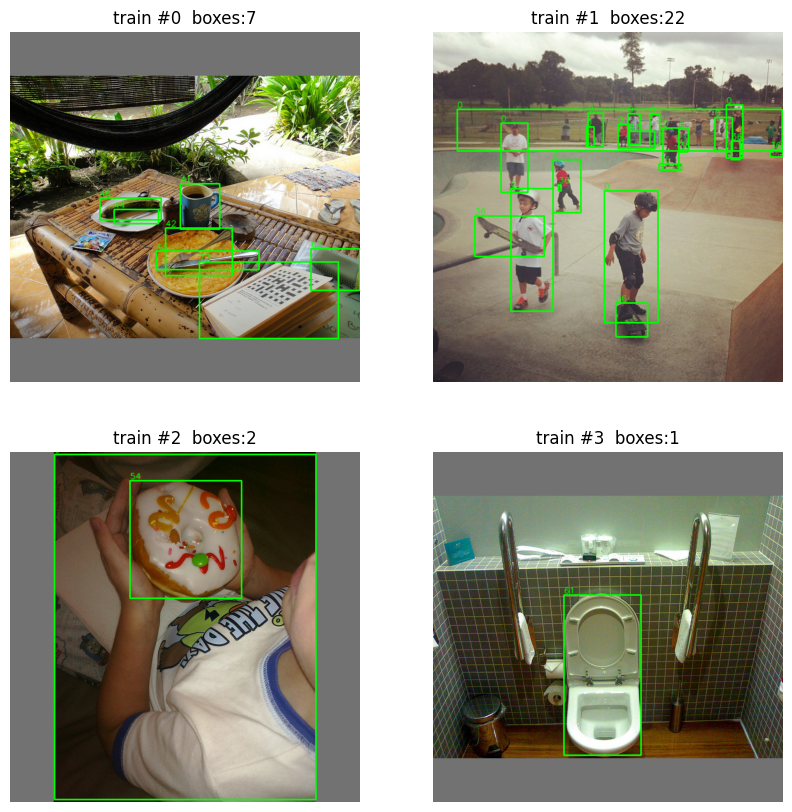

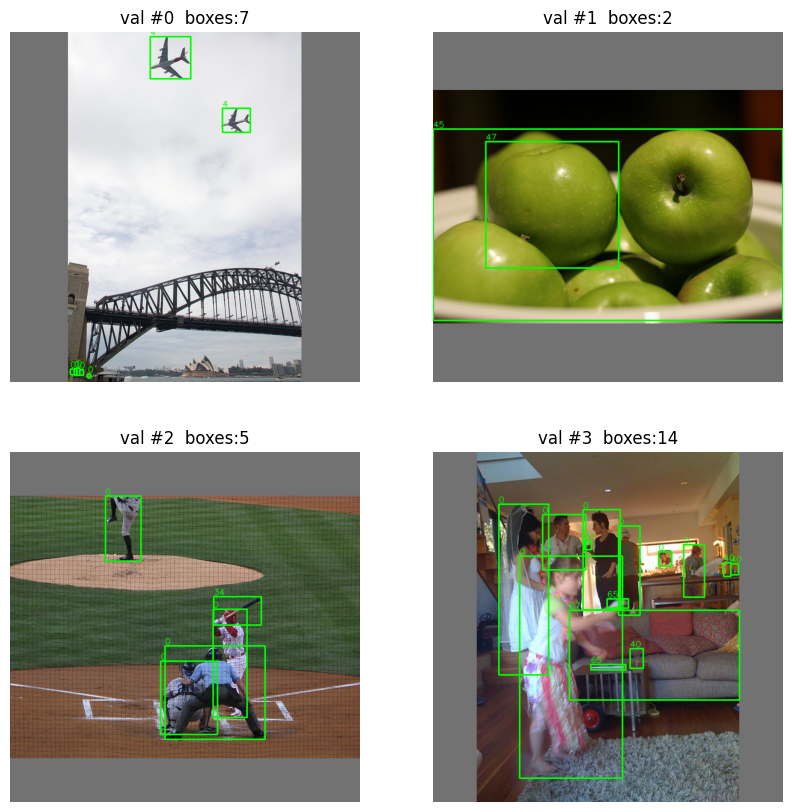

[CHUNK] current chunk paths listed: 1970; exist on disk: 1970
[SEEN] seen_filepaths.txt lines: 2500
✅ Sanity check done.


In [14]:
#sanity check
# Verifies: staging, label pairing, dataloader shapes, letterbox coords, and cache bookkeeping.
import os, glob, random, math
import numpy as np
import cv2
import torch
import matplotlib.pyplot as plt

print ("FO_CACHE_DIR:", FO_CACHE_DIR)
print ("ROOT:", ROOT)
print ("IMG_TRAIN:", IMG_TRAIN)
print ("LBL_TRAIN:", LBL_TRAIN)
print ("IMG_VAL:", IMG_VAL)
print ("LBL_VAL:", LBL_VAL)
print ("CURR_CHUNK_TXT:", CURR_CHUNK_TXT)
print ("SEEN_TXT:", SEEN_TXT)

def count_files(dir_, exts = (".jpg",".jpeg",".png",".bmp",".JPG",".JPEG",".PNG",".BMP")):
    n = 0
    for e in exts:
        n += len (glob.glob (os.path.join (dir_, e)))
    return n

n_tr_img = count_files (IMG_TRAIN)
n_tr_lbl = len (glob.glob (os.path.join (LBL_TRAIN, "*.txt")))
n_va_img = count_files (IMG_VAL)
n_va_lbl = len (glob.glob (os.path.join (LBL_VAL, "*.txt")))

print (f"[STAGED] train: {n_tr_img} images, {n_tr_lbl} labels")
print (f"[STAGED]   val: {n_va_img} images, {n_va_lbl} labels")

def stems (dir_imgs):
    exts = ("*.jpg","*.jpeg","*.png","*.bmp","*.JPG","*.JPEG","*.PNG","*.BMP")
    P = []
    for e in exts:
        P += glob.glob (os.path.join (dir_imgs, e))
    return sorted ([os.path.splitext (os.path.basename (p))[0] for p in P])

def bad_yolo_lines (lbl_path):
    bad = 0
    with open (lbl_path, "r") as f:
        for line in f:
            line = line.strip ()
            if not line:
                continue
            parts = line.split ()
            if len (parts) != 5:
                bad += 1; continue
            try:
                cls,cx,cy,w,h = parts
                cx, cy, w, h = map (float, (cx, cy, w, h))
                if not (0.0 <= cx <= 1.0 and 0.0 <= cy <= 1.0 and 0.0 <= w <= 1.0 and 0.0 <= h <= 1.0):
                    bad += 1
            except:
                bad += 1
    return bad

tr_stems = stems (IMG_TRAIN)
va_stems = stems (IMG_VAL)

missing_train_lbl = [s for s in tr_stems if not os.path.exists (os.path.join (LBL_TRAIN, s + ".txt"))]
missing_val_lbl   = [s for s in va_stems if not os.path.exists (os.path.join (LBL_VAL,   s + ".txt"))]

print (f"[CHECK] missing train labels: {len (missing_train_lbl)}")
print (f"[CHECK] missing val   labels: {len (missing_val_lbl)}")

sample_lbls = glob.glob (os.path.join (LBL_TRAIN, "*.txt"))[:20]
range_issues = sum (bad_yolo_lines (p) for p in sample_lbls)
print (f"[CHECK] sampled train label lines out of [0,1] or malformed: {range_issues}")

try:
    _train_ds = YoloDataset (IMG_TRAIN, LBL_TRAIN, imgsz = CFG ["imgsz"], augment = False, pad_value = CFG ["letterbox_pad"], horizontal_flip_prob = 0.0)
    _val_ds   = YoloDataset (IMG_VAL,   LBL_VAL,   imgsz = CFG ["imgsz"], augment = False, pad_value = CFG ["letterbox_pad"], horizontal_flip_prob = 0.0)

    _train_loader = torch.utils.data.DataLoader (
        _train_ds, batch_size = min (4, max (1, len (_train_ds))), shuffle = True, num_workers = 2,
        collate_fn = collate_fn, pin_memory = torch.cuda.is_available()
    )
    _val_loader = torch.utils.data.DataLoader(
        _val_ds, batch_size = min (4, max (1, len (_val_ds))), shuffle = False, num_workers = 2,
        collate_fn = collate_fn, pin_memory = torch.cuda.is_available()
    )

    xb, tb = next (iter (_train_loader))
    print ("[DL] train batch images:", tuple (xb.shape), xb.dtype)
    for k in ("boxes","labels","batch_index"):
        print (f"[DL] train targets[{k}]:", tuple (tb [k].shape) if hasattr (tb [k], "shape") else type (tb [k]))

    xbv, tbv = next (iter (_val_loader))
    print ("[DL]   val batch images:", tuple (xbv.shape), xbv.dtype)

    def box_bounds_ok (boxes, size):
        if boxes.numel() == 0:
            return True
        x1,y1,x2,y2 = boxes.unbind (-1)
        return bool ((x1.min () >= 0) and (y1.min () >= 0) and (x2.max () <= size) and (y2.max () <= size) )

    ok_train = box_bounds_ok (tb ["boxes"], CFG ["imgsz"])
    ok_val   = box_bounds_ok (tbv ["boxes"], CFG ["imgsz"]) if isinstance (tbv ["boxes"], torch.Tensor) else True
    print (f"[CHECK] boxes within letterbox bounds (train/val): {ok_train}/{ok_val}")

except AssertionError as e:
    print ("Dataset assertion:", e)
    xb, tb, xbv, tbv = None, None, None, None

def show_batch (images, targets, num = 4, size = CFG ["imgsz"], title = "train"):
    if images is None:
        print (f"[VIS] No {title} batch available");
        return
    B = images.shape[0]
    num = min (num, B)
    cols = min (2, num)
    rows = math.ceil (num / cols)
    plt.figure (figsize = (cols * 5, rows * 5))
    for i in range (num):
        img = images[i].numpy().transpose (1, 2, 0)
        img = (np.clip (img, 0, 1) * 255).astype (np.uint8)
        mask = (targets["batch_index"] == i)
        boxes = targets ["boxes"][mask].cpu ().numpy () if torch.is_tensor (targets ["boxes"]) else np.zeros ((0, 4))
        labels = targets ["labels"][mask].cpu ().numpy () if torch.is_tensor (targets ["labels"]) else np.zeros ((0,), dtype = int)

        canvas = img.copy ()
        for (x1,y1,x2,y2), c in zip (boxes, labels):
            x1,y1,x2,y2 = map (int, [x1, y1, x2, y2])
            cv2.rectangle (canvas,(x1, y1),(x2, y2),(0, 255, 0), 2)
            cv2.putText (canvas,str (int (c)),(x1,max (0,y1 - 3)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1, cv2.LINE_AA)
        plt.subplot (rows, cols, i + 1)
        plt.title (f"{title} #{i}  boxes:{len (boxes)}")
        plt.imshow (canvas)
        plt.axis ("off")
    plt.show ()

show_batch(xb, tb, num = 4, title = "train")
show_batch(xbv, tbv, num = 4, title = "val")

if os.path.exists (CURR_CHUNK_TXT):
    with open (CURR_CHUNK_TXT, "r") as f:
        curr_paths = [l.strip () for l in f if l.strip ()]
    exists_in_cache = sum (os.path.exists (p) for p in curr_paths)
    print (f"[CHUNK] current chunk paths listed: {len (curr_paths)}; exist on disk: {exists_in_cache}")
else:
    print ("[CHUNK] no CURR_CHUNK_TXT found yet")

if os.path.exists (SEEN_TXT):
    with open (SEEN_TXT, "r") as f:
        seen_count = sum (1 for _ in f)
    print (f"[SEEN] seen_filepaths.txt lines: {seen_count}")

print ("✅ Sanity check done.")

Stage 4: Finally the actual model, Backbone


In [15]:
#the fun part - backbone and fpn finally!!!!!!!!!!
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision

class ResNet50Backbone (nn.Module):
    #finally the fun part :))) - return c3, c4, c5 features map (strides 8, 16, 32)

    def __init__ (self, pretrained = False, freeze_bn = False):
        super ().__init__ ()

        try:
            weights = torchvision.models.ResNet50_Weights.IMAGENET1K_V2 if pretrained else None
            model = torchvision.models.resnet50 (weights=weights)
        except AttributeError:
            model = torchvision.models.resnet50 (pretrained=pretrained)

        self.stem = nn.Sequential (
            model.conv1,
            model.bn1,
            model.relu,
            model.maxpool
        )

        self.layer1 = model.layer1  #c2 stride 4
        self.layer2 = model.layer2  #c3 stride 8
        self.layer3 = model.layer3  #c4 stride 16
        self.layer4 = model.layer4  #c5 stride 32

        if freeze_bn:
            self._freeze_bn ()

    def _freeze_bn (self):
        for m in self.modules ():
            if isinstance (m, nn.BatchNorm2d):
                m.eval ()

                for p in m.parameters ():
                    p.requires_grad = False

    def forward (self, x):
        x = self.stem (x)
        x1 = self.layer1 (x)
        c3 = self.layer2 (x1)
        c4 = self.layer3 (c3)
        c5 = self.layer4 (c4)
        return c3, c4, c5

class ConvBNAct (nn.Module):
    def __init__ (self, c_in, c_out, k = 3, s = 1, p = None):
        super ().__init__ ()
        if p is None:
            p = k // 2
        self.conv = nn.Conv2d (c_in, c_out, k, s, p, bias = False)
        self.bn = nn.BatchNorm2d (c_out)
        self.act = nn.SiLU (inplace  = True)

    def forward (self, x):
        return self.act (self.bn (self.conv (x)))

class FPN (nn.Module):
    #minimal(yes i know minimal) produce p3, p4, p5 (all out_ch)
    #input (c3, c4, c5)

    def __init__ (self, c3, c4, c5, out_ch = 256):
        super ().__init__ ()

        self.l3 = nn.Conv2d (c3, out_ch, 1, 1, 0)
        self.l4 = nn.Conv2d (c4, out_ch, 1, 1, 0)
        self.l5 = nn.Conv2d (c5, out_ch, 1, 1, 0)

        self.p3 = ConvBNAct (out_ch, out_ch, 3, 1)
        self.p4 = ConvBNAct (out_ch, out_ch, 3, 1)
        self.p5 = ConvBNAct (out_ch, out_ch, 3, 1)

    def forward (self, c3, c4, c5):
      import torch.nn.functional as F
      p5 = self.l5 (c5)
      p4 = self.l4 (c4) + F.interpolate (p5, size = c4.shape [-2:], mode = "nearest")
      p3 = self.l3 (c3) + F.interpolate (p4, size = c3.shape [-2:], mode = "nearest")

      p5 = self.p5 (p5)
      p4 = self.p4 (p4)
      p3 = self.p3 (p3)

      return p3, p4, p5

class Integral (nn.Module):
    def __init__ (self, reg_max : int):
        super ().__init__ ()
        self.reg_max = int (reg_max)
        self.register_buffer ("proj", torch.arange (self.reg_max + 1, dtype = torch.float32), persistent = False)

    def forward (self, logits):
        prob = logits.softmax (dim = -1)
        return (prob * self.proj).sum (dim = -1)

In [16]:
#models/head + wrapper
class YoloV8LiteHead (nn.Module):
    #decoupled head, anchor free, no objectness
    #box predicts LTRB distances (>= 0). Will add DFL Later

    def __init__ (self, in_ch = 256, num_classes = 80, hidden = 256, num_levels = 3, reg_max = None):
        super ().__init__ ()
        self.num_classes = num_classes
        self.num_levels = num_levels
        self.reg_max = CFG.get ("reg_max", 16) if reg_max is None else int (reg_max)
        self.integral = Integral (self.reg_max)

        def make_tower ():
            return nn.Sequential (
                ConvBNAct (in_ch, hidden, 3, 1),
                ConvBNAct (hidden, hidden, 3, 1),
            )

        self.cls_towers = nn.ModuleList ([make_tower () for _ in range (num_levels)])
        self.reg_towers = nn.ModuleList ([make_tower () for _ in range (num_levels)])

        self.cls_preds = nn.ModuleList ([nn.Conv2d (hidden, num_classes, 1) for _ in range (num_levels)])
        self.box_preds = nn.ModuleList ([nn.Conv2d (hidden, 4 * (self.reg_max + 1), 1) for _ in range (num_levels)])

    def forward (self, features):
        #features: list of [p3, p4, p5], each is [B, C, H, W]
        #return: cls_outs and box outs

        cls_outs = []
        box_outs = []

        for i, f in enumerate (features):
            cls_tower = self.cls_towers [i] (f)
            reg_tower = self.reg_towers [i] (f)
            cls_outs.append (self.cls_preds [i] (cls_tower))
            box_outs.append (self.box_preds [i] (reg_tower))
            #incase jason doesn't know, softplus is ln (1 + exp(x)), always > 0
        return cls_outs, box_outs

class YoloModel (nn.Module):
    def __init__ (self, num_classes = 80, backbone = "resnet50_fpn", head_hidden = 256, fpn_out = 256):
        super ().__init__ ()
        assert backbone == "resnet50_fpn", "only resnet50_fpn wired in this mvp"
        self.backbone = ResNet50Backbone (pretrained = False)
        #channel dims for resnet50, c3, c4, c5
        self.neck = FPN (c3 = 512, c4 = 1024, c5 = 2048, out_ch = fpn_out)
        self.head = YoloV8LiteHead (in_ch = fpn_out, num_classes = num_classes, hidden = head_hidden, num_levels  = 3)
        self.strides = [8, 16, 32]

    def forward (self, x, targets = None):
      c3, c4, c5 = self.backbone (x)
      p3, p4, p5 = self.neck (c3, c4, c5)
      cls_outs, box_outs = self.head ([p3, p4, p5])
      head_out = {"features": [p3, p4, p5], "cls": cls_outs, "box": box_outs, "strides": self.strides}

      # Training path: compute & return standardized loss dict
      if self.training and targets is not None and hasattr (self, "criterion") and self.criterion is not None:
          losses, stats = self.criterion (head_out, targets)

          if torch.is_tensor(losses):
              total_loss = losses
              loss_box = stats.get ("loss_box", total_loss.detach()*0)
              loss_cls = stats.get ("loss_cls", total_loss.detach()*0)
              num_pos  = stats.get ("num_pos",  0)
          elif isinstance (losses, dict):
              total_loss = losses.get ("loss") or losses.get ("total_loss") or losses.get ("overall") or sum ([v for v in losses.values () if torch.is_tensor (v)])
              loss_box   = losses.get ("loss_box",  stats.get ("loss_box", total_loss.detach ()*0))
              loss_cls   = losses.get ("loss_cls",  stats.get ("loss_cls", total_loss.detach ()*0))
              num_pos    = losses.get ("num_pos",   stats.get ("num_pos",  0))
          else:
              raise TypeError ("criterion must return Tensor or (dict, stats) with a total loss")

          return {
              "loss": total_loss,
              "loss_box": loss_box,
              "loss_cls": loss_cls,
              "num_pos": float (num_pos),
          }

      return head_out


In [21]:
#forward smoke test
model = YoloModel (num_classes = CFG ["num_classes"], backbone = CFG ["backbone"], head_hidden = CFG ["head_hidden"], fpn_out = 256).to (device)

x = torch.randn (2, 3, CFG ["imgsz"], CFG ["imgsz"], device = device)
with torch.no_grad ():
    out = model (x)

print ("Levels:", len (out ["features"]))

for i, (c, b) in enumerate (zip (out ["cls"], out ["box"])):
    print (f"Level {i}: cls: {tuple (c.shape)}, box: {tuple (b.shape)}, stride: {model.strides [i]}")

Levels: 3
Level 0: cls: (2, 80, 80, 80), box: (2, 68, 80, 80), stride: 8
Level 1: cls: (2, 80, 40, 40), box: (2, 68, 40, 40), stride: 16
Level 2: cls: (2, 80, 20, 20), box: (2, 68, 20, 20), stride: 32


Stage 5


In [17]:
#grid and decode utilities
def make_grid (features_h, features_w, stride, device):
    ys = torch.arange (features_h, device = device)
    xs = torch.arange (features_w, device = device)
    yy, xx = torch.meshgrid (ys, xs, indexing = "ij")
    cx = (xx + 0.5) * stride
    cy = (yy + 0.5) * stride
    return cx.reshape (-1), cy.reshape (-1)

def decode_letterbox_to_xyxy (letterbox, centers_x, centers_y):
    #(n, 4), ltrb in letterbox coords
    #(n,) centers x and y in input coords
    #returns xyxy: (n, 4)

    l, t, r, b = letterbox.unbind (-1)
    x1 = centers_x - l
    y1 = centers_y - t
    x2 = centers_x + r
    y2 = centers_y + b
    return torch.stack ([x1, y1, x2, y2], dim = -1)

def flatten_head_outputs (cls_outs, box_outs, strides, image_size):
    #cls_outs and box_outs are list of [B, C, H, W] and [B, 4, H, W]
    #returns per iamge flatteded tensors
    #all_scores: list of (N, C)
    #all_boxes: list of (N, 4)
    B = cls_outs [0].shape [0]
    device = cls_outs [0].device
    all_scores = [[] for _ in range (B)]
    all_boxes = [[] for _ in range (B)]

    for (cl, bx, s) in zip (cls_outs, box_outs, strides):
        B_, C, H, W = cl.shape
        assert B_ == B

        cl = cl.permute (0, 2, 3, 1).reshape (B, H * W, C)

        M1 = bx.shape [1] // 4
        bx = bx.view (B, M1, 4, H, W).permute (0, 3, 4, 1, 2).reshape (B, H * W, 4, M1)

        probs = bx.softmax (dim = -1)
        proj = torch.arange (M1, device = bx.device, dtype = bx.dtype)
        dists = (probs * proj).sum (dim = -1) * float (s)

        cx, cy = make_grid (H, W, s, device)
        cx = cx.unsqueeze (0).expand (B, -1)
        cy = cy.unsqueeze (0).expand (B, -1)

        for i in range (B):
            xyxy = decode_letterbox_to_xyxy (dists [i], cx [i], cy [i])

            xyxy [..., 0::2].clamp_ (0, image_size)
            xyxy [..., 1::2].clamp_ (0, image_size)
            all_boxes [i].append (xyxy)
            all_scores [i].append (cl [i])

    for i in range (B):
        all_boxes [i] = torch.cat (all_boxes [i], dim = 0)
        all_scores [i] = torch.cat (all_scores [i], dim = 0)

    return all_scores, all_boxes


In [18]:
import torch
import torchvision.ops as nms

#simple nms and postprocess

@torch.no_grad ()
def post_process_one (img_boxes, img_scores, score_thresh = 0.25, iou_thresh = 0.50, max_det = 300):

    C = img_scores.shape [1]
    probs = img_scores.sigmoid ()
    conf, cls = probs.max (dim = 1)
    keep = conf > score_thresh

    if keep.sum () == 0:
        return img_boxes.new_zeros ((0, 4)), conf.new_zeros ((0,)), cls.new_zeros ((0,), dtype = torch.long)

    boxes = img_boxes [keep]
    conf = conf [keep]
    cls = cls [keep]

    offsets = cls.to (boxes) * 4096
    offset_boxes = boxes + offsets [:, None]
    keep_index = nms.nms (offset_boxes, conf, iou_thresh)

    if len (keep_index) > max_det:
        keep_index = keep_index [:max_det]
    return boxes [keep_index], conf [keep_index], cls [keep_index]

@torch.no_grad ()
def model_inference_step (model, images, image_size = 640, score_thresh = 0.25, iou_thresh = 0.50, max_det = 300):

    out = model (images)
    cls_outs = out ["cls"]
    box_outs = out ["box"]
    strides = out ["strides"]

    scores_list, boxes_list = flatten_head_outputs (cls_outs, box_outs, strides, image_size)

    results = []
    for boxes, scores in zip (boxes_list, scores_list):
        b, s, c = post_process_one (boxes, scores, score_thresh, iou_thresh, max_det)
        results.append ({"boxes": b, "scores": s, "classes": c})
    return results

In [22]:
model.eval ()
try:
    xbv, tbv = next (iter (val_loader))
except StopIteration:
    raise RuntimeError ("val_loader is empty; stage_val_once() may not have run")

xbv = xbv.to (device)
with torch.no_grad ():
    dets = model_inference_step (model, xbv, image_size=CFG["imgsz"], score_thresh=0.25, iou_thresh=0.50, max_det=100)

print (f"[SMOKE] got {len(dets)} detection lists for batch size {xbv.shape [0]}")
for i, d in enumerate (dets [:2]):
    print(f" img{i}: boxes {tuple (d ['boxes'].shape)}  scores {tuple (d ['scores'].shape)}  classes {tuple(d['classes'].shape)}")

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


[SMOKE] got 8 detection lists for batch size 8
 img0: boxes (100, 4)  scores (100,)  classes (100,)
 img1: boxes (100, 4)  scores (100,)  classes (100,)


Stage 6


In [23]:
def dfl_targets (ltrb_pixels, stride, reg_max : int):
    x = (ltrb_pixels / float (stride)).clamp_ (0.0, float (reg_max))
    l = x.floor ().clamp_ (max = float (reg_max)).long ()
    r = (l + 1).clamp_ (max = reg_max)
    w_r = (x - l.float ())
    w_l = 1.0 - w_r
    return l, r, w_l, w_r

def dfl_loss_from_logits (logits_pos, l_idx, r_idx, w_l, w_r):
    logp = logits_pos.log_softmax (dim = -1)
    left_lp = logp.gather (-1, l_idx.unsqueeze (-1)).squeeze (-1)
    right_lp = logp.gather (-1, r_idx.unsqueeze (-1)).squeeze (-1)
    loss = -(w_l * left_lp + w_r * right_lp)
    return loss.mean ()

#box ops (IoU)

def box_iou_xyxy (a, b):
    #a: (N, 4), b (N, 4) pair IoU in xyxy
    #return IoU (N, )

    x1 = torch.max (a [:, 0], b [:, 0])
    y1 = torch.max (a [:, 1], b [:, 1])
    x2 = torch.min (a [:, 2], b [:, 2])
    y2 = torch.min (a [:, 3], b [:, 3])
    inter = (x2 - x1).clamp (min = 0) * (y2 - y1).clamp (min = 0)
    area_a = (a [:, 2] - a [:, 0]).clamp (min = 0) * (a [:, 3] - a [:, 1]).clamp (min = 0)
    area_b = (b [:, 2] - b [:, 0]).clamp (min = 0) * (b [:, 3] - b [:, 1]).clamp (min = 0)
    union = area_a + area_b - inter + 1e-6
    return inter / union

def iou_loss (predict_xyxy, target_xyxy):
    return 1.0 - box_iou_xyxy (predict_xyxy, target_xyxy)

In [24]:
#center-prior assigner (top-k) + target builder

def _make_level_grids (image_size, strides, device):
    levels = []

    for s in strides:
        H = image_size // s
        W = image_size // s
        ys = torch.arange (H, device = device)
        xs = torch.arange (W, device = device)
        yy, xx = torch.meshgrid (ys, xs, indexing = "ij")
        cx = (xx + 0.5) * s
        cy = (yy + 0.5) * s

        levels.append ({
            "H": H, "W": W, "stride": s,
            "cx": cx.reshape (-1),
            "cy": cy.reshape (-1),
        })
    return levels

@torch.no_grad ()
def build_targets_center_prior (
    targets,
    num_classes : int,
    image_size : int,
    strides : list,
    topk : int = 10,
    center_radius : float = 2.5,
    device = None,
):

    B = len (targets ["image_id"])
    if device is None:
        device = targets ["boxes"].device if torch.is_tensor (targets ["boxes"]) else torch.device ("cpu")

    levels = _make_level_grids (image_size, strides, device)
    per_image = []

    M = targets ["boxes"].shape [0]
    bidx = targets ["batch_index"].to (device) if torch.is_tensor (targets ["batch_index"]) \
           else torch.tensor ([], dtype = torch.long, device = device)
    boxes_all  = targets ["boxes"].to (device).float () if M else torch.zeros ((0, 4), device = device)
    labels_all = targets ["labels"].to (device).long ()  if M else torch.zeros ((0,), dtype = torch.long, device = device)

    centers_x_all = torch.cat ([L ["cx"] for L in levels], dim = 0)
    centers_y_all = torch.cat ([L ["cy"] for L in levels], dim = 0)
    N = centers_x_all.numel ()

    for i in range (B):
        sel = (bidx == i)
        gt = boxes_all [sel]
        gc = labels_all [sel]
        Gi = gt.shape [0]

        position_mask    = torch.zeros (N, dtype = torch.bool, device = device)
        t_box_letterbox  = torch.zeros (N, 4, device = device)
        t_box_xyxy       = torch.zeros (N, 4, device = device)
        t_cls            = torch.zeros (N, num_classes, device = device)
        matched_gt_index = torch.full ((N,), -1, dtype = torch.long, device = device)

        if Gi == 0:
            per_image.append ((t_cls, t_box_letterbox, t_box_xyxy, position_mask, matched_gt_index))
            continue

        start = 0
        for L in levels:
            radius = center_radius * L ["stride"]
            HW     = L ["H"] * L ["W"]
            cx     = L ["cx"]
            cy     = L ["cy"]

            gx1 = (gt [:, 0] - radius).clamp_ (0, image_size)
            gy1 = (gt [:, 1] - radius).clamp_ (0, image_size)
            gx2 = (gt [:, 2] + radius).clamp_ (0, image_size)
            gy2 = (gt [:, 3] + radius).clamp_ (0, image_size)

            in_x = (cx.unsqueeze (0) >= gx1.unsqueeze (1)) & (cx.unsqueeze (0) <= gx2.unsqueeze (1))
            in_y = (cy.unsqueeze (0) >= gy1.unsqueeze (1)) & (cy.unsqueeze (0) <= gy2.unsqueeze (1))
            inside = in_x & in_y

            if inside.any ():
                gcx = (gt [:, 0] + gt [:, 2]) / 2
                gcy = (gt [:, 1] + gt [:, 3]) / 2
                dx = torch.abs (cx.unsqueeze (0) - gcx.unsqueeze (1))
                dy = torch.abs (cy.unsqueeze (0) - gcy.unsqueeze (1))
                distance = dx + dy

                distance_masked = torch.where (inside, distance, torch.full_like (distance, 1e9))
                k = min (topk, HW)
                _, inds = torch.topk (-distance_masked, k=k, dim=1)
                flat_index = (inds + start).reshape (-1)
                position_mask [flat_index] = True
                matched_gt_index [flat_index] = torch.arange (Gi, device = device).unsqueeze (1).expand (-1, k).reshape (-1)

            start += HW

        pos_index = torch.nonzero (position_mask, as_tuple=  False).flatten ()

        if pos_index.numel ():
            mg = matched_gt_index [pos_index]
            gt_sel = gt [mg]

            cxp = centers_x_all [pos_index]
            cyp = centers_y_all [pos_index]

            # LTRB distances
            l = (cxp - gt_sel [:, 0]).clamp_min (0)
            t = (cyp - gt_sel [:, 1]).clamp_min (0)
            r = (gt_sel [:, 2] - cxp).clamp_min (0)
            b = (gt_sel [:, 3] - cyp).clamp_min (0)
            t_box_letterbox [pos_index] = torch.stack ([l, t, r, b], dim = 1)

            x1 = cxp - l
            y1 = cyp - t
            x2 = cxp + r
            y2 = cyp + b
            t_box_xyxy [pos_index] = torch.stack ([x1, y1, x2, y2], dim = 1)

            t_cls [pos_index, gc [mg]] = 1.0

        per_image.append ((t_cls, t_box_letterbox, t_box_xyxy, position_mask, matched_gt_index))

    return per_image, levels

In [25]:
def sigmoid_focal_loss(logits, targets, alpha=0.25, gamma=2.0, reduction="sum"):
    # logits, targets: same shape
    p = torch.sigmoid(logits)
    ce = F.binary_cross_entropy_with_logits(logits, targets, reduction="none")
    p_t = p*targets + (1 - p)*(1 - targets)
    loss = ce * ((1 - p_t) ** gamma)
    if alpha is not None:
        alpha_t = alpha*targets + (1 - alpha)*(1 - targets)
        loss = alpha_t * loss
    if reduction == "sum":
        return loss.sum()
    elif reduction == "mean":
        return loss.mean()
    return loss

In [26]:
#loss writing
class DetectionLoss(nn.Module):
    def __init__(self, num_classes, image_size, strides, lambda_box=2.5, lambda_cls=1.0):
        super().__init__()
        self.num_classes = num_classes
        self.image_size = image_size
        self.strides = strides
        self.lambda_box = lambda_box
        self.lambda_cls = lambda_cls

    def forward(self, head_out, targets):
        cls_outs = head_out["cls"]
        box_outs = head_out["box"]
        strides  = head_out["strides"]

        device = cls_outs[0].device
        scores_list, boxes_list = flatten_head_outputs(cls_outs, box_outs, strides, self.image_size)

        per_image_targets, _levels = build_targets_center_prior(
            targets,
            num_classes=self.num_classes,
            image_size=self.image_size,
            strides=self.strides,
            topk=10,
            center_radius=2.5,
            device=device,
        )

        total_loss   = torch.zeros((), device=device)
        loss_box_sum = torch.zeros((), device=device)
        loss_cls_sum = torch.zeros((), device=device)
        num_pos_sum  = 0

        for i in range(len(scores_list)):
            img_scores = scores_list[i]  # (N, C)
            img_boxes  = boxes_list[i]   # (N, 4)
            t_cls, t_box_letterbox, t_box_xyxy, position_mask, matched_gt_index = per_image_targets[i]

            pos_index = torch.nonzero(position_mask, as_tuple=False).flatten()
            num_pos   = pos_index.numel()
            num_pos_sum += num_pos

            loss_dfl_sum = img_scores.newzeros (())
            start = 0

            for L, box_logits_level in zip (_levels, head_out ["box"]):
                HW, s = L ["H"] * L ["W"], L ["stride"]
                mask_level = (pos_index >= start) & (pos_index < start + HW)
                if mask_level.any ():
                    index_flat = pos_index [mask_level] - start
                    bl = box_logits_level [i]
                    M1 = bl.shape [0] // 4
                    bl = bl.view (M1, 4, L ["H", L ["W"]]).permute (2, 3, 0, 1).reshape (HW, 4, M1)
                    logits_pos = bl [index_flat]

                    t_ltrb = t_box_letterbox [pos_index [mask_level]]
                    l_idx, r_idx, w_l, w_r = dfl_targets (t_ltrb, stride = s, reg_max = CFG ["reg_max"])

                    loss_dfl_sum = loss_dfl_sum + dfl_loss_from_logits (logits_pos, l_idx, r_idx, w_l, w_r)
                start += HW

        total_loss = total_loss + 0.5 * loss_dfl_sum

        # --- classification loss: positives only, matched class only ---
        if num_pos:
            # class id from one-hot targets
            cls_ids    = t_cls[pos_index].argmax(dim=1)          # (P,)
            logits_pos = img_scores[pos_index, cls_ids]          # (P,)
            targets_pos= torch.ones_like(logits_pos)             # positives = 1
            loss_cls   = F.binary_cross_entropy_with_logits(logits_pos, targets_pos, reduction="mean")
        else:
            loss_cls = img_scores.new_zeros(())

        # --- box loss: positives only (IoU on decoded xyxy) ---
        if num_pos:
            pred_boxes_pos   = img_boxes[pos_index]
            target_boxes_pos = t_box_xyxy[pos_index]
            # mean over positives
            loss_box = iou_loss(pred_boxes_pos, target_boxes_pos).mean()
        else:
            loss_box = img_boxes.new_zeros(())

        total_loss   = total_loss   + self.lambda_cls * loss_cls + self.lambda_box * loss_box
        loss_box_sum = loss_box_sum + loss_box
        loss_cls_sum = loss_cls_sum + loss_cls

        B = len(scores_list)
        total_loss   = total_loss   / max(1, B)
        loss_box_sum = loss_box_sum / max(1, B)
        loss_cls_sum = loss_cls_sum / max(1, B)
        num_pos_avg  = num_pos_sum  / max(1, B)

        return total_loss, {
            "loss_box": loss_box_sum,
            "loss_cls": loss_cls_sum,
            "num_pos":  num_pos_avg,
        }

In [29]:
# quick DFL smoke test
M = CFG["reg_max"] + 1
P = 5
logits = torch.randn(P, 4, M, requires_grad=True)  # fake head logits
target_ltrb_px = torch.tensor([[3.2, 7.7, 1.1, 0.0]]*P)  # pixels
stride = 1
l_idx, r_idx, w_l, w_r = dfl_targets(target_ltrb_px, stride, CFG["reg_max"])
loss = dfl_loss_from_logits(logits, l_idx, r_idx, w_l, w_r)
loss.backward()
print("DFL test OK:", float(loss) > -1e9 and logits.grad is not None)

DFL test OK: True


/tmp/ipython-input-753639376.py:10: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at /pytorch/torch/csrc/autograd/generated/python_variable_methods.cpp:835.)
  print("DFL test OK:", float(loss) > -1e9 and logits.grad is not None)


In [ ]:
with torch.no_grad():
    for conv in model.head.cls_preds:
        conv.bias.fill_( -4.595 )

In [ ]:
from torch.amp import GradScaler, autocast

criterion = DetectionLoss (
    num_classes = CFG ["num_classes"],
    image_size  = CFG ["imgsz"],
    strides     = [8, 16, 32],
    lambda_box  = CFG ["loss_weights"]["box"],
    lambda_cls  = CFG ["loss_weights"]["cls"],
)

model.criterion = criterion

def build_optimizer (model, cfg):
    if cfg ["optimizer"].lower () == "adamw":
        optimizer = torch.optim.AdamW (model.parameters (), lr = cfg ["lr"], weight_decay = cfg ["weight_decay"])
    else:
        optimizer = torch.optim.SGD (model.parameters (), lr = cfg ["lr"], momentum = 0.9, weight_decay = cfg ["weight_decay"], nesterov = True)

    if cfg.get ("cosine_schedule", True):
        scheduler = torch.optim.lr_scheduler.CosineAnnealingLR (optimizer, T_max = cfg ["epochs"])
    else:
        scheduler = torch.optim.lr_scheduler.MultiStepLR (optimizer, milestones = [int (0.7 * cfg ["epochs"])], gamma = 0.1)

    return optimizer, scheduler

scaler = GradScaler (enabled = CFG ["amp"])

optimizer, scheduler = build_optimizer (model, CFG)

def _standardize_losses (losses, stats = None):
    if torch.is_tensor (losses):
        total = losses
        lb = stats.get ("loss_box", total.detach () * 0) if isinstance (stats, dict) else total.detach () * 0
        lc = stats.get ("loss_cls", total.detach ()*0) if isinstance (stats, dict) else total.detach () * 0
        np_ = float (stats.get ("num_pos", 0)) if isinstance (stats, dict) else 0.0
        return {"loss": total, "loss_box": lb, "loss_cls": lc, "num_pos": np_}

    if isinstance (losses, dict):
        total = losses.get("loss") or losses.get("total_loss") or losses.get("overall")
        if total is None:
            total = sum([v for v in losses.values() if torch.is_tensor(v)])
        lb = losses.get("loss_box", (stats.get("loss_box") if isinstance(stats, dict) else total.detach()*0))
        lc = losses.get("loss_cls", (stats.get("loss_cls") if isinstance(stats, dict) else total.detach()*0))
        np_ = losses.get("num_pos", (stats.get("num_pos") if isinstance(stats, dict) else 0))
        return {"loss": total, "loss_box": lb, "loss_cls": lc, "num_pos": float(np_)}

    raise TypeError("criterion must return a Tensor or a dict of losses")

def train_step (model, batch, device):
    model.train ()
    images, targets = batch
    images = images.to (device, non_blocking=True)

    optimizer.zero_grad(set_to_none=True)

    with torch.amp.autocast('cuda', enabled=CFG.get("amp", True)):
        head_out = model(images)

        if not (hasattr(model, "criterion") and model.criterion is not None):
            raise RuntimeError("model.criterion is not set; cannot compute training loss.")
        losses, stats = model.criterion(head_out, targets)
        loss_dict = _standardize_losses(losses, stats)

        total_loss = loss_dict["loss"]
        loss_box   = loss_dict.get("loss_box", total_loss.detach()*0)
        loss_cls   = loss_dict.get("loss_cls", total_loss.detach()*0)
        num_pos    = loss_dict.get("num_pos", 0.0)

    scaler.scale(total_loss).backward()

    if CFG.get("grad_clip_norm", None):
        try:
            scaler.unscale_(optimizer)
        except RuntimeError as e:
            if "already been called" not in str(e):
                raise
        torch.nn.utils.clip_grad_norm_(model.parameters(), CFG["grad_clip_norm"])

    scaler.step (optimizer)
    scaler.update ()

    return {
        "loss": float (total_loss.detach().item()),
        "loss_box": float (loss_box.detach().item()) if torch.is_tensor(loss_box) else float(loss_box),
        "loss_cls": float (loss_cls.detach().item()) if torch.is_tensor(loss_cls) else float(loss_cls),
        "num_pos": float (num_pos),
    }

In [ ]:
#ema
import copy

class ModelEMA:
    def __init__ (self, model, decay = 0.9998, device = None):
        self.module = copy.deepcopy (model).eval ()
        for p in self.module.parameters ():
            p.requires_grad_ (False)
        self.decay = decay
        if device:
            self.module.to (device)

    @torch.no_grad ()
    def update (self, model):
        msd = model.state_dict ()
        esd = self.module.state_dict ()
        d = self.decay
        for k in esd.keys():
          if esd[k].dtype.is_floating_point:
              esd[k].mul_(d).add_(msd[k].detach(), alpha=1.0 - d)
          else:
              esd[k].copy_(msd[k])

ema = ModelEMA (model, decay = CFG ["ema_decay"], device = device)
print ("EMA ready with decay", CFG ["ema_decay"])

In [ ]:
#overfit a tiny subset to check learning

from collections import deque
import time

tiny_count = min (400, len (train_ds))
indices = torch.randperm (len (train_ds)) [:tiny_count].tolist ()
tiny_subset = torch.utils.data.Subset (train_ds, indices)
tiny_loader = DataLoader (
    tiny_subset, batch_size = min (CFG ["batch_size"], 8), shuffle = True, num_workers = 2, pin_memory = torch.cuda.is_available (), collate_fn = collate_fn
)

print (f"[SANITY] Overfitting tiny subset: {len (tiny_subset)} iamges")

history = deque (maxlen = 50)

for epoch in range (1):
    t0 = time.time ()

    for it, batch in enumerate (tiny_loader):
        stats = train_step (model, batch, device)
        ema.update (model)
        history.append (stats ["loss"])

        if (it + 1) % 10 == 0:
            print (f"epoch {epoch+1} iter {it+1}, loss = {stats ['loss']:.4f}, box = {stats ['loss_box']:.4f}, cls = {stats ['loss_cls']:.4f}, pos = {stats ['num_pos']}, time = {time.time () - t0:.2f}s")

    scheduler.step ()
    print (f"epoch {epoch+1} done, avg loss = {sum (history) / len (history):.4f}, time = {time.time () - t0:.2f}s")

Stage 7


In [ ]:
#loader builders

def build_loader (image_dir, label_dir, cfg, shuffle):
    ds = YoloDataset (
        image_dir, label_dir,
        imgsz = cfg ["imgsz"],
        augment = shuffle,
        pad_value = cfg ["letterbox_pad"],
        horizontal_flip_prob = (cfg ["hflip_p"] if shuffle else 0.0),
        hsv_hgain = cfg.get ("hsv_h", 0.0),
        hsv_sgain = cfg.get ("hsv_s", 0.0),
        hsv_vgain = cfg.get ("hsv_v", 0.0),
    )

    dl = DataLoader (
        ds, batch_size = cfg ["batch_size"], shuffle = shuffle, num_workers = 4,
        collate_fn = collate_fn, pin_memory = torch.cuda.is_available (),
        persistent_workers = False,
        generator = torch.Generator ().manual_seed (cfg ["seed"]),
    )
    return ds, dl

VAL_IMG_DIR = os.path.join (CFG ["data_root"], CFG ["val_img_dir"])
VAL_LBL_DIR = os.path.join (CFG ["data_root"], CFG ["val_lbl_dir"])
val_ds, val_loader = build_loader (VAL_IMG_DIR, VAL_LBL_DIR, CFG, shuffle = False)
print ("val size:", len (val_ds))

In [ ]:

#coco mAP eval
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval

def undo_letterbox_to_original (xyxy, pad, scale, original_size):
    px, py = pad
    x1 = (xyxy [..., 0] - px) / scale
    y1 = (xyxy [..., 1] - py) / scale
    x2 = (xyxy [..., 2] - px) / scale
    y2 = (xyxy [..., 3] - py) / scale
    H, W = original_size
    x1.clamp_ (0, W - 1)
    x2.clamp_ (0, W - 1)
    y1.clamp_ (0, H - 1)
    y2.clamp_ (0, H - 1)
    return torch.stack ([x1, y1, x2, y2], dim = 1)

def _image_size_from_stem (stem):
    #try common image extensions

    for e in (".jpg", ".jpeg", ".png", ".bmp", ".tiff"):
        p = os.path.join (VAL_IMG_DIR, stem + e)

        if os.path.exists (p):
            im = val_ds._read_image (p)
            return im.shape [:2]
    raise FileNotFoundError (f"no image for {stem}")

@torch.no_grad ()
def evaluate_map_coco (model, val_loader, device, imgsz = 640, score_thresh = 0.001):
    categories = [{"id": i, "name": n} for i, n in enumerate (COCO_NAMES)]
    coco_gt = {"images" : [], "annotations": [], "categories": categories}
    ann_id = 1

    for idx, stem in enumerate (val_loader.dataset.stems):
        H, W = _image_size_from_stem (stem)
        coco_gt ["images"].append ({"id": idx, "height": H, "width": W, "file_name": stem})
        lp = os.path.join (VAL_LBL_DIR, stem + ".txt")

        if os.path.exists (lp):
            arr = val_loader.dataset._read_labels (lp)

            if arr.size:
                boxes, cls = yolo_to_xyxy (arr, W, H)
                for j , (x1, y1, x2, y2) in enumerate (boxes):
                    coco_gt ["annotations"].append ({
                        "id": ann_id,
                        "image_id": idx,
                        "category_id": int (cls [j]),
                        "bbox": [float (x1), float (y1), float (x2 - x1), float (y2 - y1)],
                        "area": float (max (0.0, (x2 - x1)) * max (0.0, (y2 - y1))),
                        "iscrowd": 0,
                    })
                    ann_id += 1

    cocoGt = COCO ()
    cocoGt.dataset = coco_gt
    cocoGt.createIndex ()

    #model inference
    dets_json = []
    model.eval ()
    for images, targets in val_loader:
        images = images.to (device, non_blocking = True)
        outs = model_inference_step (model, images, image_size = imgsz, score_thresh = score_thresh, iou_thresh = 0.7, max_det = 300)

        for b, det in enumerate (outs):
            stem = targets ["image_id"]
            image_index = val_loader.dataset.stems.index (stem)
            H, W = targets ["orig_size"] [b]
            scale = targets ["scale"][b]
            pad = targets ["pad"][b]
            if det ["boxes"].numel () == 0:
                continue
            bx_original = undo_letterbox_to_original (det ["boxes"].clone (), pad, scale, (H, W))
            sc = det ["scores"].tolist ()
            cl = det ["classes"].tolist ()

            for k in range (bx_original.shape [0]):
                x1, y1, x2, y2 = bx_original [k].tolist ()
                dets_json.append ({
                    "image_id": image_index,
                    "category_id": int (cl [k]),
                    "bbox": [x1, y1, x2 - x1, y2 - y1],
                    "score": float (sc [k]),
                })

    if len (dets_json):
        cocoDt = cocoGt.loadRes (dets_json)
    else:
        cocoDt = cocoGt.loadRes ([])
    cocoEval = COCOeval (cocoGt, cocoDt, iouType = "bbox")
    cocoEval.params.useCats
    cocoEval.evaluate ()
    cocoEval.accumulate ()
    cocoEval.summarize ()
    return float (cocoEval.stats [0]) if cocoEval.stats is not None else 0.0

In [ ]:
#resume helper

def load_checkpoint (path, model, ema = None, optimizer = None, scheduler = None, device = "cuda"):
    checkpoint = torch.load (path, map_location = device)
    model.load_state_dict (checkpoint ["model"])
    if ema and "ema" in checkpoint:
        ema.module.load_state_dict (checkpoint ["ema"])
    if optimizer and "optimizer" in checkpoint:
        optimizer.load_state_dict (checkpoint ["optimizer"])
    if scheduler and "scheduler" in checkpoint:
        scheduler.load_state_dict (checkpoint ["scheduler"])
    print ("Loaded checkpoint:", path)
    return checkpoint.get ("epoch", 0)

In [ ]:
ckpt_path = "/content/drive/MyDrive/yolo-lab/runs/20250929_180837_yolov8_coco_proto/ckpt_e003.pt"

start_epoch = load_checkpoint (
    ckpt_path,
    model,
    ema = ema,
    optimizer = optimizer,
    scheduler = scheduler,
    device = device
)

start_epoch = load_checkpoint (
    ckpt_path,
    model,
    ema = ema,
    optimizer = optimizer,
    scheduler = scheduler,
    device = device
)

In [ ]:
def maybe_resume_current_run(RUN_DIR, model, ema, optimizer, scheduler, device):
    last = _latest_checkpoint_path(RUN_DIR)
    if last:
        ep = load_checkpoint(last, model, ema=ema, optimizer=optimizer, scheduler=scheduler, device=device)
        print(f"[resume] current run: {RUN_DIR} -> {last} (epoch {ep})")
        return int(ep)
    print(f"[resume] no checkpoints in {RUN_DIR} — starting fresh")
    return 0

In [ ]:
import os, time, math, json, torch
from collections import defaultdict
from datetime import datetime
import torch.nn.functional as F
from IPython.display import display, clear_output
import time

global_step     = 0
last_viz_time   = 0.0
viz_every       = 20
min_interval    = 5.0
EPOCHS          = 9
LOG_EVERY       = 20
VIZ_EVERY       = 20
VAL_EVERY_EPOCH = 1
SAVE_EVERY_EPOCH= 1
MAX_TRAIN_STEPS = None

if train_loader is None:
    TRAIN_IMG_DIR = os.path.join (CFG ["data_root"], CFG ["train_img_dir"])
    TRAIN_LBL_DIR = os.path.join (CFG ["data_root"], CFG ["train_lbl_dir"])
    if not os.path.isdir (TRAIN_IMG_DIR) or not os.path.isdir (TRAIN_LBL_DIR):
        raise RuntimeError ("Train data dirs not found; run staging cells first.")
    train_ds = YoloDataset (
        TRAIN_IMG_DIR, TRAIN_LBL_DIR, imgsz = CFG ["imgsz"], augment = True,
        pad_value = CFG ["letterbox_pad"], horizontal_flip_prob = CFG ["hflip_p"],
        hsv_hgain = CFG ["hsv_h"], hsv_sgain = CFG ["hsv_s"], hsv_vgain = CFG ["hsv_v"]
    )
    train_loader = DataLoader (
        train_ds, batch_size = CFG ["batch_size"], shuffle = True, num_workers = 2,
        collate_fn = collate_fn, pin_memory = torch.cuda.is_available (),
        persistent_workers = False, worker_init_fn = _wif,
        generator = torch.Generator ().manual_seed (CFG ["seed"]),
    )

def undo_letterbox_to_original (xyxy, pad, scale, original_size):
    px, py = pad
    x1 = (xyxy [..., 0] - px) / scale
    y1 = (xyxy [..., 1] - py) / scale
    x2 = (xyxy [..., 2] - px) / scale
    y2 = (xyxy [..., 3] - py) / scale
    H, W = original_size
    x1.clamp_ (0, W - 1); x2.clamp_ (0, W - 1)
    y1.clamp_ (0, H - 1); y2.clamp_ (0, H - 1)
    return torch.stack ([x1, y1, x2, y2], dim = 1)

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

plt.ion ()
_fig, _axs = plt.subplots (1, 2, figsize = (12, 6))

def show_live_batch (model, batch, dataset, img_dir, lbl_dir, step, max_images = 2):
    for ax in _axs:
        ax.cla ()

    images, targets = batch
    dev = next (model.parameters ()).device
    images_dev = images.to (dev, non_blocking = True)
    outs = model_inference_step (
        model, images_dev, image_size = CFG ["imgsz"], score_thresh = 0.001, iou_thresh = 0.7, max_det = 50
    )

    nshow = min (len (images), max_images)
    for i in range (nshow):
        stem  = targets ["image_id"] [i]
        H, W  = targets ["orig_size"] [i]
        scale = targets ["scale"] [i]; pad = targets ["pad"] [i]

        img_path = None
        for e in (".jpg", ".jpeg", ".png", ".bmp", ".JPG", ".JPEG", ".PNG", ".BMP"):
            p = os.path.join (img_dir, stem + e)
            if os.path.exists (p):
                img_path = p
                break
        if img_path:
            img_disp = dataset._read_image (img_path)
        else:
            img_disp = (images [i].cpu ().permute (1, 2, 0).numpy () * 255).astype ("uint8")

        if outs [i] ["boxes"].numel () > 0:
            pred_boxes = undo_letterbox_to_original (outs [i] ["boxes"].cpu (), pad, scale, (H, W)).numpy ()
            pred_cls   = outs [i] ["classes"].cpu ().numpy ()
        else:
            pred_boxes, pred_cls = [], []

        gt_boxes = []
        gt_cls   = []
        lp = os.path.join (lbl_dir, stem + ".txt")
        if os.path.exists (lp):
            arr = dataset._read_labels (lp)
            if arr.size:
                bxyxy, cls = yolo_to_xyxy (arr, W, H)
                gt_boxes, gt_cls = bxyxy, cls.astype (int).tolist ()

        # LEFT: predictions
        _axs [0].imshow (img_disp)
        _axs [0].set_title (f"Predictions @ step {step}")
        for j, (x1, y1, x2, y2) in enumerate (pred_boxes):
            _axs [0].add_patch (Rectangle ((x1, y1), x2 - x1, y2 - y1, fill = False, edgecolor = "lime", lw = 1))
            _axs [0].text (x1, max (0, y1 - 3), str (int (pred_cls [j])), fontsize = 7, color = "lime")
        _axs [0].axis ("off")

        # RIGHT: ground truth
        _axs [1].imshow (img_disp)
        _axs [1].set_title ("Ground Truth")
        for j, (x1, y1, x2, y2) in enumerate (gt_boxes):
            _axs [1].add_patch (Rectangle ((x1, y1), x2 - x1, y2 - y1, fill = False, edgecolor = "red", lw = 1))
            _axs [1].text (x1, max (0, y1 - 3), str (gt_cls [j]), fontsize = 7, color = "red")
        _axs [1].axis ("off")

    _fig.suptitle (f"Step {step}")
    _fig.canvas.draw ()
    _fig.canvas.flush_events ()
    # plt.pause (0.001)  # optional

    return _fig  # return the persistent figure so caller can display it

def save_checkpoint (epoch, model, ema, optimizer, scheduler, run_dir):
    ckpt = {
        "epoch": epoch,
        "model": model.state_dict (),
        "ema":   ema.module.state_dict () if ema is not None else None,
        "optimizer": optimizer.state_dict (),
        "scheduler": scheduler.state_dict () if scheduler is not None else None,
        "cfg": CFG,
        "timestamp": datetime.now ().isoformat (timespec = "seconds"),
    }
    path = os.path.join (run_dir, f"ckpt_e{epoch:03d}.pt")
    torch.save (ckpt, path)
    print (f"💾 Saved checkpoint -> {path}")
    return path

def validate_brief (model, val_loader, device):
    model.eval ()
    total = 0.0
    nimg  = 0
    with torch.no_grad ():
        for images, targets in val_loader:
            images = images.to (device, non_blocking = True)
            outs = model_inference_step (model, images, image_size = CFG ["imgsz"], score_thresh = 0.001, iou_thresh = 0.7)
            total += sum (d ["boxes"].shape [0] for d in outs)
            nimg  += images.shape [0]
            if nimg >= 64:  # keep it brief
                break
    return float (total) / max (1, nimg)

print (f"▶️ Starting training for {EPOCHS} epochs on device {device} ...")
global_step = 0
loss_ema = None


try:
    start_epoch = 0
    if CFG.get("resume", True):
      start_epoch = maybe_resume_current_run(RUN_DIR, model, ema, optimizer, scheduler, device)
    for epoch in range (start_epoch + 1, EPOCHS + 1):
        model.train ()
        t0 = time.time ()
        for it, batch in enumerate (train_loader):
            if MAX_TRAIN_STEPS is not None and it >= MAX_TRAIN_STEPS:
                break

            stats = train_step (model, batch, device)
            ema.update (model)

            loss_ema = stats ["loss"] if loss_ema is None else (0.9 * loss_ema + 0.1 * stats ["loss"])
            global_step += 1   # single increment per batch

            if (it + 1) % LOG_EVERY == 0:
                print (f"epoch {epoch:02d} it {it + 1:04d} | "
                       f"loss {stats ['loss']:.4f} (ema {loss_ema:.4f}) | "
                       f"box {stats ['loss_box']:.4f} cls {stats ['loss_cls']:.4f} | "
                       f"pos {stats ['num_pos']:.1f} | "
                       f"{time.time () - t0:.1f}s")

            should_viz = (global_step % viz_every == 0) or (time.time () - last_viz_time >= min_interval)

            if should_viz:
                try:
                    fig = show_live_batch (
                        model, batch,
                        dataset = train_ds,
                        img_dir = TRAIN_IMG_DIR, lbl_dir = TRAIN_LBL_DIR,
                        step = global_step, max_images = 4
                    )


                    clear_output (wait = True)
                    print (f"epoch {epoch:02d} it {it + 1:04d} | "
                       f"loss {stats ['loss']:.4f} (ema {loss_ema:.4f}) | "
                       f"box {stats ['loss_box']:.4f} cls {stats ['loss_cls']:.4f} | "
                       f"pos {stats ['num_pos']:.1f} | "
                       f"{time.time () - t0:.1f}s")
                    display (fig)
                    # do not close the persistent figure
                    last_viz_time = time.time ()
                except Exception as e:
                    print (f"[live-viz] skipped at step {global_step}: {e}")

        scheduler.step ()

        if (epoch % VAL_EVERY_EPOCH) == 0:
            val_proxy = validate_brief (ema.module, val_loader, device)
            print (f"🔎 epoch {epoch:02d} brief-val proxy (#dets/img) = {val_proxy:.2f}")

        if (epoch % SAVE_EVERY_EPOCH) == 0:
            save_checkpoint (epoch, model, ema, optimizer, scheduler, RUN_DIR)

    print ("✅ Training loop finished.")

except Exception as e:
    print ("\n⛔ Interrupted. Saving emergency checkpoint...")
    save_checkpoint (epoch, model, ema, optimizer, scheduler, RUN_DIR)

In [ ]:
import os, glob


def _latest_checkpoint_path (run_dir):
    pats = sorted (glob.glob (os.path.join (run_dir, "ckpt_e*.pt")))
    return pats [-1] if pats else None

def resume_from_latest (run_dir, model, ema = None, optimizer = None, scheduler = None, device = "cuda"):
    ck = _latest_checkpoint_path (run_dir)
    if ck is None:
        print ("[resume] no checkpoint found in", run_dir)
        return 0
    if "load_checkpoint" not in globals ():
        raise RuntimeError ("load_checkpoint () is not defined in this runtime")
    last_epoch = load_checkpoint (ck, model, ema = ema, optimizer = optimizer, scheduler = scheduler, device = device)
    print (f"[resume] loaded {ck} (epoch {last_epoch})")
    return int (last_epoch)

def roll_next_train_chunk ():
    """
    Disposes current staged train chunk, marks it as seen, optionally deletes cached media,
    stages a fresh ~2000-sample train view, then rebuilds train_ds and train_loader.
    """
    print ("🔁 Rolling to next train chunk...")
    # uses your existing helpers and files: SEEN_TXT, CURR_CHUNK_TXT, FO_CACHE_DIR
    dispose_current_chunk (delete_from_cache = True, mark_seen = True)   # resets /content/yolo_data/* and appends seen  :contentReference[oaicite:1]{index=1}
    stage_train_chunk ()                                                 # loads fresh 2k with low overlap + writes YOLO labels  :contentReference[oaicite:2]{index=2}

    # rebuild dataset + loader with the same config you used before
    global train_ds, train_loader, TRAIN_IMG_DIR, TRAIN_LBL_DIR
    TRAIN_IMG_DIR = os.path.join (CFG ["data_root"], CFG ["train_img_dir"])
    TRAIN_LBL_DIR = os.path.join (CFG ["data_root"], CFG ["train_lbl_dir"])

    train_ds = YoloDataset (
        TRAIN_IMG_DIR, TRAIN_LBL_DIR,
        imgsz = CFG ["imgsz"], augment = True,
        pad_value = CFG ["letterbox_pad"], horizontal_flip_prob = CFG ["hflip_p"],
        hsv_hgain = CFG ["hsv_h"], hsv_sgain = CFG ["hsv_s"], hsv_vgain = CFG ["hsv_v"]
    )
    train_loader = DataLoader (
        train_ds, batch_size = CFG ["batch_size"], shuffle = True, num_workers = 4,
        collate_fn = collate_fn, pin_memory = torch.cuda.is_available (),
        persistent_workers = False, worker_init_fn = _wif,
        generator = torch.Generator ().manual_seed (CFG ["seed"]),
    )

    print (f"[roll] staged train images: {len (train_ds)}  (dir = {TRAIN_IMG_DIR})")
    return train_ds, train_loader

'''
import gc, torch

# 1) Drop references from the last epoch/loop
last_batch = None  # if you keep any refs for debugging, set them to None

# 2) Kill old loader/dataset so worker processes and pinned buffers can exit
try:
    _ = iter (train_loader)
except:
    pass
del train_loader, train_ds
gc.collect ()

# 3) Flush CUDA cache from previous batches
torch.cuda.empty_cache ()
torch.cuda.reset_peak_memory_stats ()
train_ds, train_loader = roll_next_train_chunk ()
'''

In [ ]:
#resume
from fiftyone import ViewField as F

# 2) resume model & optimizer from latest checkpoint
start_epoch = resume_from_latest (RUN_DIR, model, ema, optimizer, scheduler, device)

# 3) rebuild dataset and loader from the last chunk you rolled to
TRAIN_IMG_DIR = os.path.join (CFG ["data_root"], CFG ["train_img_dir"])
TRAIN_LBL_DIR = os.path.join (CFG ["data_root"], CFG ["train_lbl_dir"])

train_ds = YoloDataset (
    TRAIN_IMG_DIR, TRAIN_LBL_DIR,
    imgsz = CFG ["imgsz"], augment = True,
    pad_value = CFG ["letterbox_pad"], horizontal_flip_prob = CFG ["hflip_p"],
    hsv_hgain = CFG ["hsv_h"], hsv_sgain = CFG ["hsv_s"], hsv_vgain = CFG ["hsv_v"]
)
train_loader = DataLoader (
    train_ds, batch_size = CFG ["batch_size"], shuffle = True, num_workers = 4,
    collate_fn = collate_fn, pin_memory = torch.cuda.is_available (),
    persistent_workers = False, worker_init_fn = _wif,
    generator = torch.Generator ().manual_seed (CFG ["seed"]),
)

In [ ]:
import torch
print("allocated:", torch.cuda.memory_allocated() / 1024**3, "GB")
print("cached   :", torch.cuda.memory_reserved() / 1024**3, "GB")